# **Cinemática de un robot planar**

**Docente:** PhD Jorge Rudas

**Diseño de prototipos - 2025 I**

**INFOTEP**

## Importar librerias

In [1]:
import numpy as np
from sympy import*
init_printing()

## Se crean variables simbólicas

In [2]:
## Variables Simbolicas
theta_1 = symbols("theta_1",  real=True)
theta_2 = symbols("theta_2",  real=True)
l_1 = symbols("l_1",  real=True)
l_2 = symbols("l_2",  real=True)

## Transformación desde el estado 0 al estado 1

In [3]:
_0H1 = Matrix([[cos(theta_1), -sin(theta_1), 0, 0], [sin(theta_1), cos(theta_1), 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])

In [4]:
_0H1


⎡cos(θ₁)  -sin(θ₁)  0  0⎤
⎢                       ⎥
⎢sin(θ₁)  cos(θ₁)   0  0⎥
⎢                       ⎥
⎢   0        0      1  0⎥
⎢                       ⎥
⎣   0        0      0  1⎦

## Transformación desde el estado 1 al estado 2

In [5]:
_1H2 = Matrix([[1, 0, 0, l_1], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])

In [6]:
_1H2

⎡1  0  0  l₁⎤
⎢           ⎥
⎢0  1  0  0 ⎥
⎢           ⎥
⎢0  0  1  0 ⎥
⎢           ⎥
⎣0  0  0  1 ⎦

## Transformación desde el estado 2 al estado 3

In [7]:
_2H3 = Matrix([[cos(theta_2), -sin(theta_2), 0, 0], [sin(theta_2), cos(theta_2), 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])

In [8]:
_2H3

⎡cos(θ₂)  -sin(θ₂)  0  0⎤
⎢                       ⎥
⎢sin(θ₂)  cos(θ₂)   0  0⎥
⎢                       ⎥
⎢   0        0      1  0⎥
⎢                       ⎥
⎣   0        0      0  1⎦

## Transformación desde el estado 3 al estado 4

In [9]:
_3H4 = Matrix([[1, 0, 0, l_2], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])

In [10]:
_3H4


⎡1  0  0  l₂⎤
⎢           ⎥
⎢0  1  0  0 ⎥
⎢           ⎥
⎢0  0  1  0 ⎥
⎢           ⎥
⎣0  0  0  1 ⎦

## Composición de cada estado de la cinemática

In [11]:
H = simplify(_0H1@_1H2@_2H3@_3H4)

In [12]:
H

⎡cos(θ₁ + θ₂)  -sin(θ₁ + θ₂)  0  l₁⋅cos(θ₁) + l₂⋅cos(θ₁ + θ₂)⎤
⎢                                                            ⎥
⎢sin(θ₁ + θ₂)  cos(θ₁ + θ₂)   0  l₁⋅sin(θ₁) + l₂⋅sin(θ₁ + θ₂)⎥
⎢                                                            ⎥
⎢     0              0        1               0              ⎥
⎢                                                            ⎥
⎣     0              0        0               1              ⎦

## Posición del efector final

In [13]:
P = H[0:2, 3]

In [14]:
P

⎡l₁⋅cos(θ₁) + l₂⋅cos(θ₁ + θ₂)⎤
⎢                            ⎥
⎣l₁⋅sin(θ₁) + l₂⋅sin(θ₁ + θ₂)⎦

In [15]:
import matplotlib.pyplot as plt
import numpy as np

def dibujar_brazo_mecanico(theta1, theta2, l1, l2):
  """Función para dibujar un brazo mecanico con 2 grados de libertad.

  Parametros:
    theta1: Angulo de la primera articulacion en radianes.
    theta2: Angulo de la segunda articulacion en radianes.
    l1: Longitud del primer extremo
    l2: Longitud del segundo extremo
  """

  # Calculamos la posición del efector final
  x1 = l1 * np.cos(theta1)
  y1 = l1 * np.sin(theta1)
  x2 = x1 + l2 * np.cos(theta1 + theta2)
  y2 = y1 + l2 * np.sin(theta1 + theta2)

  # Dibujando el brazo con lineas y puntos
  plt.figure(figsize=(6, 6))
  plt.plot([0, x1], [0, y1], 'b-', linewidth=5)  # First link
  plt.plot([x1, x2], [y1, y2], 'b-', linewidth=5)  # Second link
  plt.plot(0, 0, 'ro', markersize=10)  # Base
  plt.plot(x2, y2, 'go', markersize=10)  # End-effector

  # Se dibujan los límites y los labels
  plt.xlim([-l1 - l2, l1 + l2])
  plt.ylim([-l1 - l2, l1 + l2])
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.title('Brazo robótico')
  plt.grid(True)
  plt.show()

## Ejemplo de manipulación del brazo robotico en su estado final

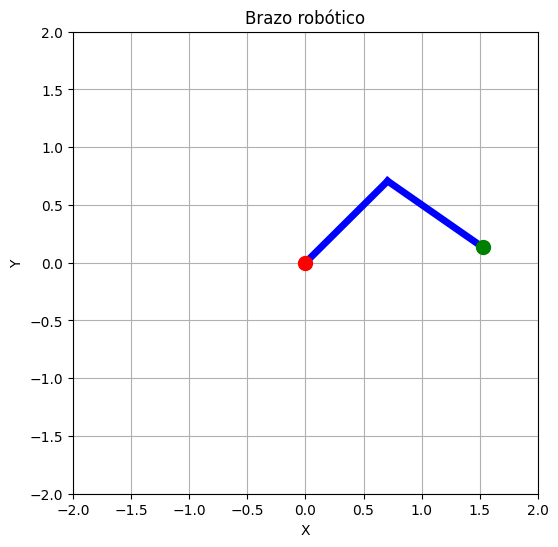

In [16]:
theta1 = np.deg2rad(45)  # 45 grados
theta2 = np.deg2rad(-80)  # -30 grados
l1 = 1
l2 = 1
dibujar_brazo_mecanico(theta1, theta2, l1, l2)

## **Taller**

*  Dibujar cada estado del anterior brazo robótico
*  Imagine un brazo robótico cuyas extremidades miden 2 unidades cada una. Podría este brazo alcanzar cualquier objeto dentro de la cuadricula de 2 x 2? Explique detalladamente su razonamiento

El brazo robótico, ¿puede alcanzar cualquier objeto dentro de la cuadrícula de 2x2?: True


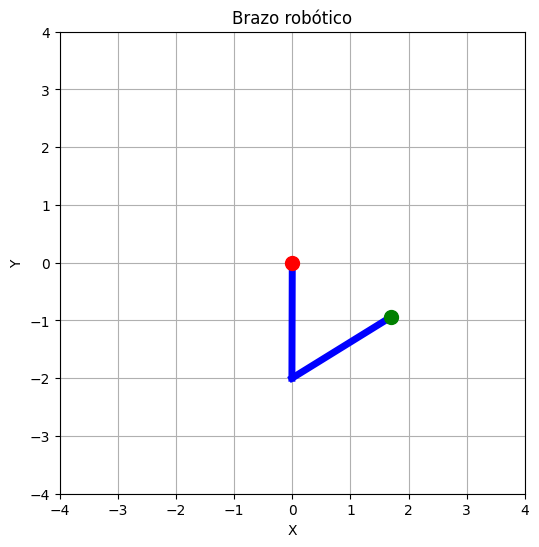

In [17]:
def puede_alcanzar(l1, l2, grid_size):
  """
  Determina si un brazo robótico puede alcanzar cualquier punto dentro de una cuadrícula.

  Args:
    l1: Longitud del primer eslabón.
    l2: Longitud del segundo eslabón.
    grid_size: La mitad de la longitud del lado de la cuadrícula (la cuadrícula se centra en el origen).

  Returns:
    True si el brazo puede alcanzar cualquier punto dentro de la cuadrícula, False en caso contrario.
  """
  alcance_maximo = l1 + l2
  distancia_maxima_grid = np.sqrt(2 * grid_size**2)  # Distancia de (0,0) a la esquina de la cuadrícula

  return alcance_maximo >= distancia_maxima_grid

# Parámetros del brazo robótico
l1 = 2
l2 = 2
grid_size = 1  # La cuadrícula es de 2x2, por lo que la mitad de la longitud del lado es 1

# Verificar si el brazo puede alcanzar la cuadrícula
alcanza = puede_alcanzar(l1, l2, grid_size)

print(f"El brazo robótico, ¿puede alcanzar cualquier objeto dentro de la cuadrícula de 2x2?: {alcanza}")

# Dibujar el brazo en una posición aleatoria dentro de la cuadrícula
if alcanza:
    theta1 = np.random.uniform(0, 2*np.pi)
    theta2 = np.random.uniform(0, 2*np.pi)
    dibujar_brazo_mecanico(theta1, theta2, l1, l2)
else:
    print("El brazo no puede alcanzar la cuadrícula, por lo que no se mostrará la visualización.")

### Razonamiento detallado: ###
                
1. **Alcance máximo del brazo:** El brazo tiene dos eslabones, cada uno de longitud 2. Por lo tanto, el alcance máximo del brazo es la suma de las longitudes de sus eslabones, que es 2 + 2 = 4 unidades.
2. **Distancia máxima dentro de la cuadrícula:** La cuadrícula de 2x2 se centra en el origen (0,0). La distancia más lejana que el brazo necesita alcanzar es una de las esquinas de la cuadrícula.  Usando el teorema de Pitágoras, la distancia desde el centro (0,0) hasta una esquina (1,1) es sqrt(1^2 + 1^2) = sqrt(2) ≈ 1.414 unidades.
3. **Comparación:** Dado que el alcance máximo del brazo (4 unidades) es mayor que la distancia máxima dentro de la cuadrícula (aproximadamente 1.414 unidades), el brazo puede alcanzar cualquier punto dentro de la cuadrícula de 2x2.
4. Por lo tanto, la respuesta es: **Verdadero**, el brazo robótico puede alcanzar cualquier objeto dentro de la cuadrícula de 2x2.